# Image Classifier Project 
Image classification system
- The dataset is composed of dog and cat photos provided as a subset of photos from a much larger collection of 3 million manually annotated photos. This data was obtained through a collaboration between Petfinder.com and Microsoft.

#### Step 1: Loading the dataset
- The dataset was dowloaded in Kaggle. (https://www.kaggle.com/c/dogs-vs-cats/data)
- In the data/raw folder, there are three files named "cats", "dogs" and "test". The train data is divided in "cats" and "dogs" and contains 25000 image files (.jpg format) of dogs and cats. The pictures are labeled by their file name, with the word dog or cat.

In [81]:
# Import Packages:

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

#### Step 2: Visualize the input information
- The first nine pictures of dogs were printed in a single figure. The same for cats images.
- We will see if the pictures are in color and if they have different shapes and sizes.

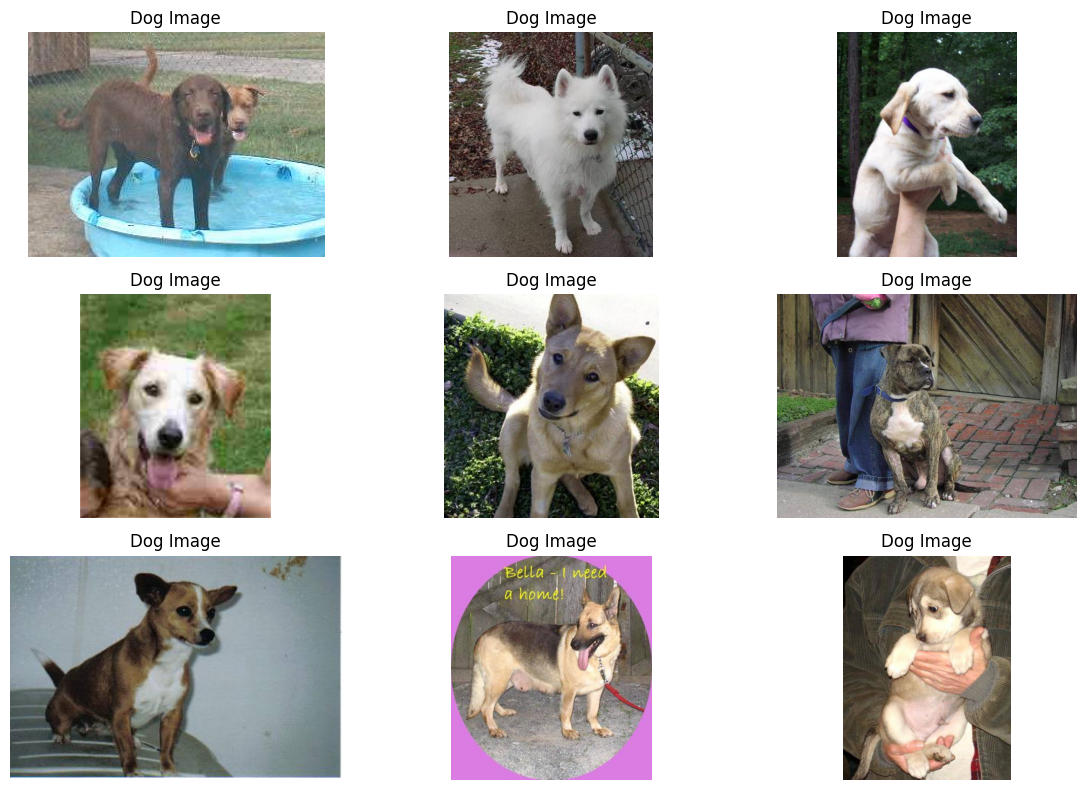

In [82]:
# Import and check the images for dogs:

data_dir = "/workspaces/4GeeksAcademy-machine-learning-Image-Classifier-Juli-MM/data/raw"

# Get a list of all dog image file names:

dogs_subfolder = os.path.join(data_dir, "dogs")

# Get a list of all dog image file names:

dogs_image_files = os.listdir(dogs_subfolder)

# Load the first nine dog images:

dog_images = []
for i in range(9):
    img_path = os.path.join(dogs_subfolder, dogs_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images:

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout:

plt.tight_layout()

# Show the pictures:

plt.show()

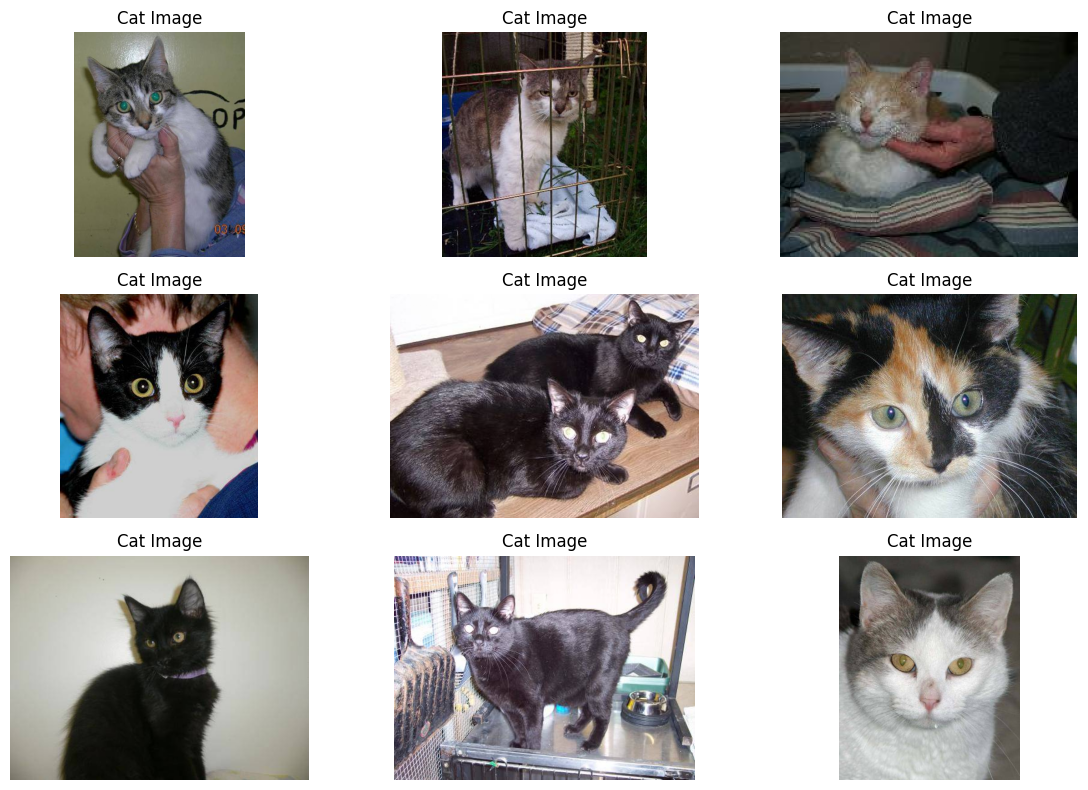

In [83]:
# Import and Check first for cats:

# Path to the directory containing your image data:

data_dir = '/workspaces/4GeeksAcademy-machine-learning-Image-Classifier-Juli-MM/data/raw'

# Get a list of all cat image file names:

cats_subfolder = os.path.join(data_dir, 'cats')

# Get a list of all Cat image file names:

cats_image_files = os.listdir(cats_subfolder)

# Load the first nine cat images:

cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Create a single figure to display all cat images:

plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout:

plt.tight_layout()

# Show the pictures:

plt.show()

- We will create an ImageDataGenerator object for training and test data. Then pass the folder that has training data to the "datagentrain" object and, similarly, pass the folder that has test data to the "datagentest" object. In this way, the images will be automatically labeled, and everything will be ready to enter the network.

In [84]:
# Define a few rules for DataGen:

train_dir = "/workspaces/4GeeksAcademy-machine-learning-Image-Classifier-Juli-MM/data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation:

train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dogs", "cats"] 
)

# Test Data Generation:

test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


#### Step 3: Build an  Artificial Neural Network(ANN)

In [85]:
# Move the Data Through the Neural Network:

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers:

model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [86]:
class_indices = train_data.class_indices
print(class_indices)

{'dogs': 0, 'cats': 1}


In [87]:
# Compile the Model using Adam:

from keras.optimizers import Adam

# Compile the Model before Training:

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [89]:
# Train the Model:

model.fit(train_data, epochs=1)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_30" is incompatible with the layer: expected axis -1 of input shape to have value 25088, but received input with shape (None, 18432)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 200, 200, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_91 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 134,268,738 (512.19 MB)

 Non-trainable params: 0 (0.00 B)

#### Step 4: Save the Model:

In [96]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#checkpoint = ModelCheckpoint('/workspaces/4GeeksAcademy-machine-learning-Image-Classifier-Juli-MM/models/vgg16_1.keras', monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
#early = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='auto')
#hist = model.fit(train_data, steps_per_epoch=100, validation_data=test_data, validation_steps=10, epochs=3, callbacks=[checkpoint,early])

In [ ]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# Configure the Plot Layout
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])

# Plot
plt.show()

#### Try and Predict the Images

ValueError: File not found: filepath=/workspaces/4GeeksAcademy-machine-learning-Image-Classifier-Juli-MM/models/vgg16_1.keras. Please ensure the file is an accessible `.keras` zip file.

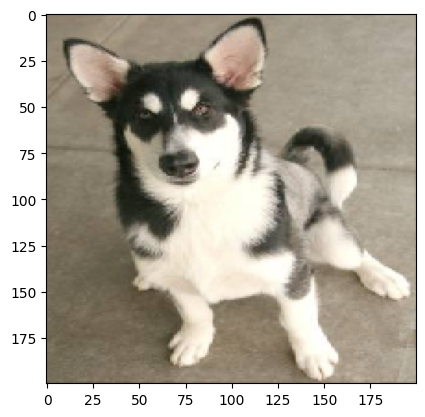

In [108]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img('/workspaces/4GeeksAcademy-machine-learning-Image-Classifier-Juli-MM/data/raw/test/132.jpg',target_size=(200,200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
saved_model = load_model('/workspaces/4GeeksAcademy-machine-learning-Image-Classifier-Juli-MM/models/vgg16_1.keras')
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print('cat')
else:
    print('dog')